In [201]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from scipy.ndimage import gaussian_filter
from grid import create_grid



In [202]:
with h5py.File("frames/data_00100.h5", "r") as f:
    phi0 = f["phi"][:]
    sigma_xx0 = f["sigma_xx"][:]
    sigma_xy0 = f["sigma_xy"][:]
    sigma_yy0 = f["sigma_yy"][:]
    # X10 = f["X1"][:]
    # X20 = f["X2"][:]
    # J0 = f["J"][:]
    a0 = f["a"][:]
    b0 = f["b"][:]

with h5py.File("frames/data_00100.h5", "r") as f:
    phi = f["phi"][:]
    sigma_xx = f["sigma_xx"][:]
    sigma_xy = f["sigma_xy"][:]
    sigma_yy = f["sigma_yy"][:]
    # X1 = f["X1"][:]
    # X2 = f["X2"][:]
    # J = f["J"][:]
    a = f["a"][:]
    b = f["b"][:]


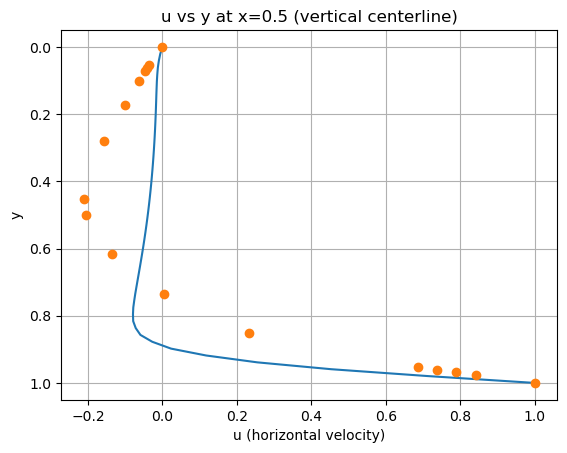

In [203]:
# plot the benchmark at cavity center line
Ny = Nx = 50
y = np.linspace(0, 1, Ny)
# a = gaussian_filter(a, sigma=0.5)
u_center_x = a0[:, Nx // 2]  # u_x at center vertical line

# load plot_u_y_Ghia100.csv first column y and second column u
u_ghia = np.loadtxt("plot_u_y_Ghia100.csv", delimiter=",", skiprows=1)
y_ghia = u_ghia[:, 0]
u_ghia = u_ghia[:, 1]
# plot the benchmark at cavity center line



plt.figure()
plt.plot(u_center_x, y)
plt.plot(u_ghia, y_ghia, "o", label="Ghia et al. (1982)")
plt.xlabel("u (horizontal velocity)")
plt.ylabel("y")
plt.title("u vs y at x=0.5 (vertical centerline)")
plt.grid(True)
plt.gca().invert_yaxis()  # optional to match standard benchmark view
plt.show()

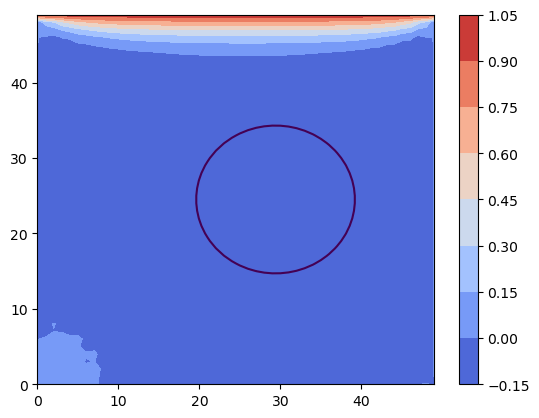

In [204]:
plt.contourf(a, levels=10, cmap="coolwarm")
plt.colorbar()
plt.contour(phi, levels=[0])

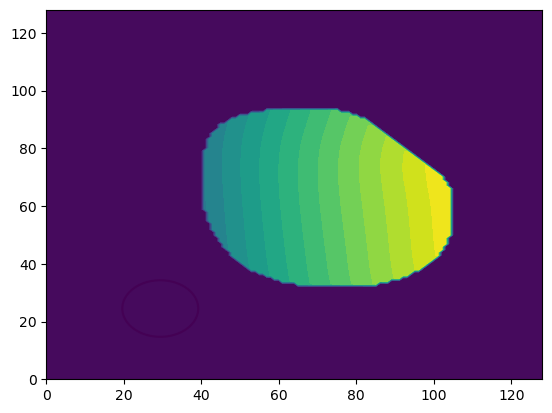

In [205]:
plt.contourf(X1, levels=20)
plt.contour(phi, levels=[0])

IndexError: index 50 is out of bounds for axis 1 with size 50

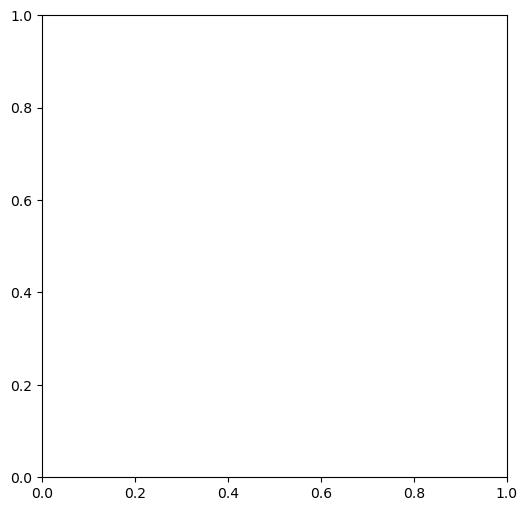

In [206]:
Nx, Ny = 129, 129
Lx, Ly = 1.0, 1.0
X, Y, dx, dy = create_grid(Nx, Ny, Lx, Ly)

fig, ax = plt.subplots(figsize=(6, 6))

# Plot deformed horizontal edges (only if both endpoints are inside solid)
for j in range(Ny):
    for i in range(Nx - 1):
        if phi[j, i] <= 5*dx and phi[j, i + 1] <= 5*dx:
            ax.plot([X1[j, i], X1[j, i + 1]], [X2[j, i], X2[j, i + 1]], color='black', linewidth=0.8)

# Plot deformed vertical edges (only if both endpoints are inside solid)
for i in range(Nx):
    for j in range(Ny - 1):
        if phi[j, i] <= 5*dx and phi[j + 1, i] <= 5*dx:
            ax.plot([X1[j, i], X1[j + 1, i]], [X2[j, i], X2[j + 1, i]], color='black', linewidth=0.8)

# Overlay level-set φ=0 boundary in (X, Y) space
ax.contour(X, Y, phi, levels=[0], colors='red', linewidths=1.2, linestyles='--')
ax.contour(X, Y, phi0, levels=[0], colors='red', linewidths=1.2, linestyles='--')


ax.set_aspect('equal')
ax.set_xlabel("X1 (deformed)")
ax.set_ylabel("X2 (deformed)")
ax.set_title("Deformed Solid Mesh with φ=0 Boundary in (X, Y)")
plt.show()


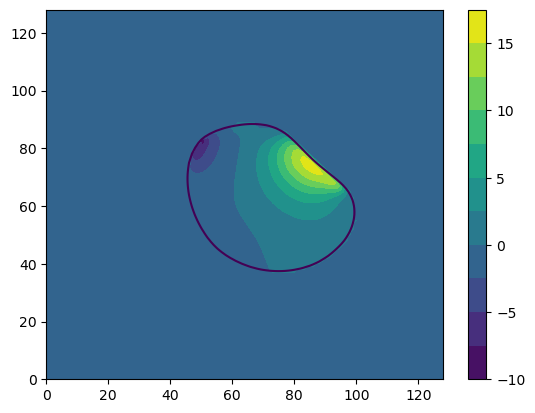

In [ ]:
# smooth out the data
solid_mask = phi <= 0
sigma_yy = gaussian_filter(sigma_yy, sigma=1)
plt.contourf(sigma_yy*solid_mask, levels=10)


plt.colorbar()
plt.contour(phi, levels=[0])

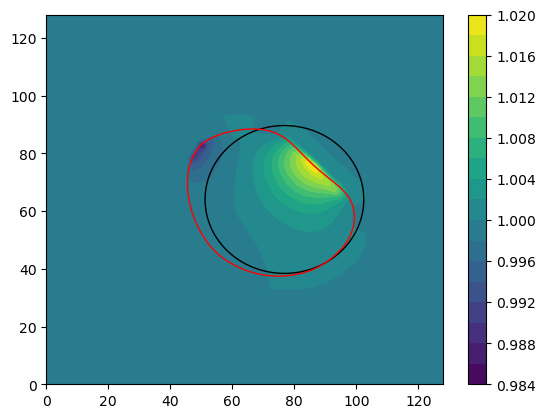

In [ ]:
J = gaussian_filter(J, sigma=1)
plt.contour(phi0, levels=[0], colors='k', linewidths=1)
plt.contour(phi, levels=[0], colors='r', linewidths=1)
plt.contourf(J, levels=20)
plt.colorbar()


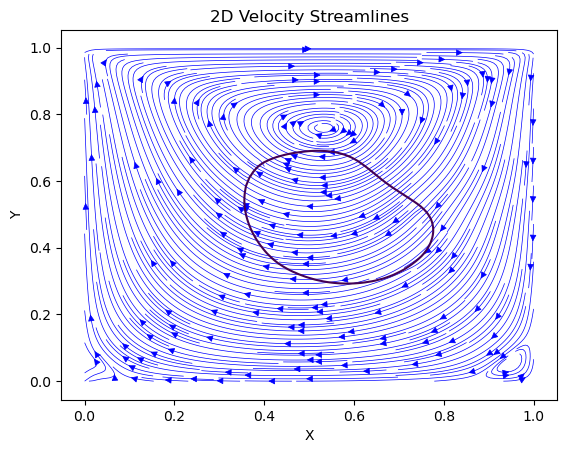

In [ ]:
# Create Meshgrid for 3D surface plot
Nx, Ny = 129, 129
Lx, Ly = 1.0, 1.0
X, Y, dx, dy = create_grid(Nx, Ny, Lx, Ly)

# plot 2D velocity streamlines
fig, ax = plt.subplots()
ax.streamplot(X, Y, a, b, color='b', linewidth=0.5, density=3.5)
ax.set_title('2D Velocity Streamlines')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.contour(X, Y, phi, levels=[0])
plt.show()

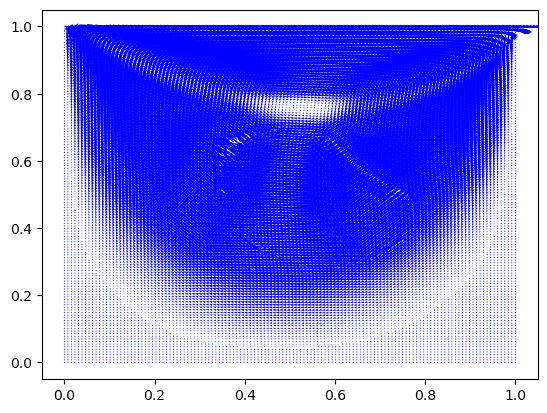

In [ ]:
plt.quiver(X, Y,a, b, angles='xy', scale_units='xy', scale=8.5, color='b')